In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [28]:
df = df.drop(columns='RiskLevel', axis=1)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


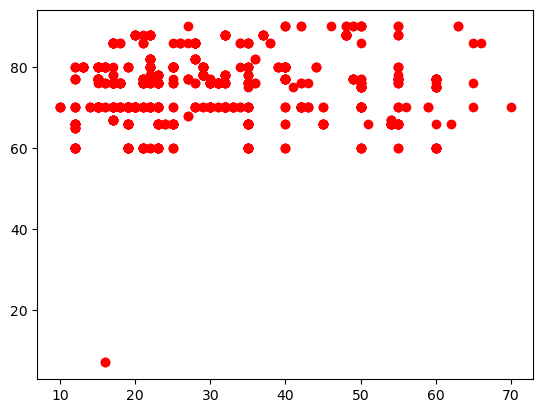

In [29]:
plt.scatter(df['Age'], df['HeartRate'], color='red')

In [30]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.1)
clf.fit(df)
predictions = clf.predict(df)

In [31]:
predictions

array([ 1,  1,  1, ..., -1,  1,  1])

In [32]:
abn_ind = np.where(predictions<0)
abn_ind

(array([   7,   19,   20,   35,   91,  105,  108,  110,  111,  114,  117,
         123,  130,  152,  166,  180,  181,  191,  210,  232,  248,  262,
         275,  276,  277,  287,  316,  317,  319,  326,  337,  338,  339,
         340,  341,  362,  370,  372,  382,  413,  416,  417,  419,  422,
         425,  426,  428,  431,  432,  435,  442,  458,  471,  482,  486,
         502,  505,  506,  535,  538,  551,  553,  583,  596,  613,  631,
         640,  644,  657,  658,  661,  670,  672,  679,  683,  687,  689,
         772,  787,  789,  818,  848,  849,  910,  928,  939,  955,  959,
         961,  967,  970,  976,  982,  992,  994, 1000, 1001, 1005, 1009,
        1010, 1011], dtype=int64),)

In [33]:
X = df.values

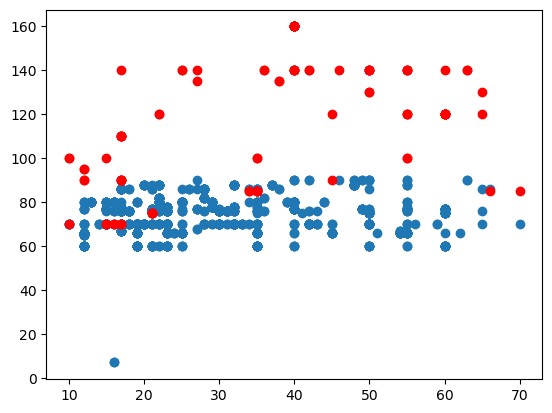

In [34]:
abn_ind = np.where(predictions<0)
plt.scatter(df['Age'],df['HeartRate'])
plt.scatter(X[abn_ind,0],X[abn_ind,1],color='red')

# DBSCAN

In [35]:
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

In [36]:
X,y = make_circles(n_samples=750,noise=0.1,factor=0.3)

In [37]:
X

array([[ 0.18684118, -0.19990793],
       [ 0.95784816, -0.43508416],
       [ 1.14027618,  0.27461003],
       ...,
       [-0.26419972, -0.11261888],
       [-0.84149676,  0.50480894],
       [-0.26780897,  0.14513823]])

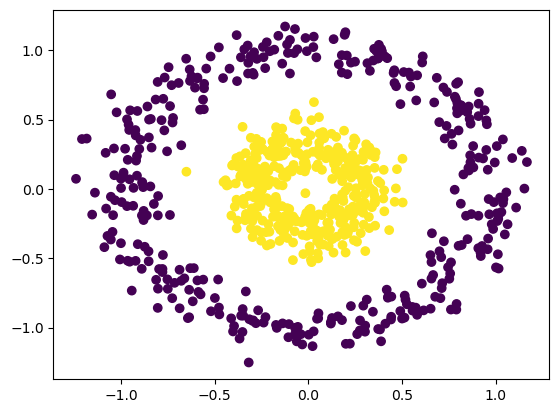

In [38]:
plt.scatter(X[:,0],X[:,1],c=y)

In [39]:
dbscan = DBSCAN(eps=0.10)

In [40]:
dbscan.fit_predict(X)

array([ 0,  1, -1, -1,  1,  0,  0,  0,  0,  1,  2,  2,  3,  0, -1,  0,  0,
        0,  4,  5,  6,  0,  0,  5,  0,  0,  5,  0,  0,  5,  5,  7,  4,  4,
        0,  0,  0, -1,  1,  0,  2,  2,  1,  1,  0,  0,  6,  4,  0,  0,  0,
        1,  7,  2,  6,  1,  0,  1,  2,  0,  0,  0,  0, -1,  0,  0,  0,  3,
        1,  1,  0,  1,  4,  1,  0, -1,  5,  0,  1,  0,  8,  0,  2,  0,  0,
        0,  0,  2,  2,  6,  0,  0,  0,  0,  0,  0,  0,  3,  2,  1,  4,  1,
        3,  0,  6,  1,  4,  1,  2,  0,  1,  0,  2,  8,  1,  0,  0,  0,  0,
        8,  3,  0,  0,  3,  0, -1,  6,  2,  0,  1,  2,  0,  0, -1,  0,  1,
        0, -1,  0,  4,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0, -1,
        1,  1,  0,  1,  0,  2,  4,  1,  5,  1,  0,  0,  0,  0,  0,  0,  4,
        0,  0, -1,  0,  0,  6,  1,  8,  5,  0,  0,  0,  0,  4,  7,  0,  2,
        0,  0,  0,  2,  0,  0,  1,  0,  0,  5,  0,  2,  0,  5,  0,  0,  0,
        2,  1,  0,  8,  5,  0,  0,  0,  1,  0,  0,  3,  2,  2,  0,  0,  0,
        0,  1,  0,  0,  0

In [41]:
dbscan.labels_

array([ 0,  1, -1, -1,  1,  0,  0,  0,  0,  1,  2,  2,  3,  0, -1,  0,  0,
        0,  4,  5,  6,  0,  0,  5,  0,  0,  5,  0,  0,  5,  5,  7,  4,  4,
        0,  0,  0, -1,  1,  0,  2,  2,  1,  1,  0,  0,  6,  4,  0,  0,  0,
        1,  7,  2,  6,  1,  0,  1,  2,  0,  0,  0,  0, -1,  0,  0,  0,  3,
        1,  1,  0,  1,  4,  1,  0, -1,  5,  0,  1,  0,  8,  0,  2,  0,  0,
        0,  0,  2,  2,  6,  0,  0,  0,  0,  0,  0,  0,  3,  2,  1,  4,  1,
        3,  0,  6,  1,  4,  1,  2,  0,  1,  0,  2,  8,  1,  0,  0,  0,  0,
        8,  3,  0,  0,  3,  0, -1,  6,  2,  0,  1,  2,  0,  0, -1,  0,  1,
        0, -1,  0,  4,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0, -1,
        1,  1,  0,  1,  0,  2,  4,  1,  5,  1,  0,  0,  0,  0,  0,  0,  4,
        0,  0, -1,  0,  0,  6,  1,  8,  5,  0,  0,  0,  0,  4,  7,  0,  2,
        0,  0,  0,  2,  0,  0,  1,  0,  0,  5,  0,  2,  0,  5,  0,  0,  0,
        2,  1,  0,  8,  5,  0,  0,  0,  1,  0,  0,  3,  2,  2,  0,  0,  0,
        0,  1,  0,  0,  0

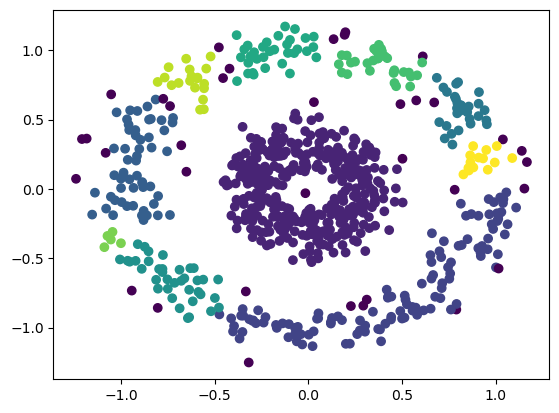

In [42]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

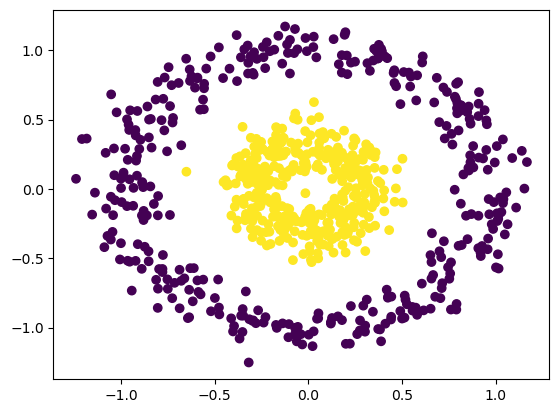

In [43]:
plt.scatter(X[:,0],X[:,1],c=y)

## Local outlier factor 
There are two types of outliers:
1. Local outliers
2. Global outliers


Local outlier factor with the help of K-Nearest Neighbors calculates the local density of a given point. If the local density is low, the point is a local outlier.

## Local outlier factors

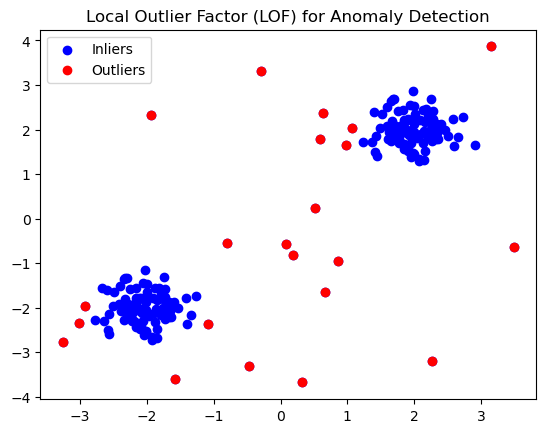

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate random data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Combine inliers and outliers
X = np.r_[X_inliers, X_outliers]

# Fit the LOF model
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)

# Plotting
plt.title("Local Outlier Factor (LOF) for Anomaly Detection")
plt.scatter(X[:, 0], X[:, 1], color='b', label="Inliers")
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], color='r', label="Outliers")
plt.legend()
plt.show()